# Step 3: Data Analysis

- Reads in processed dataframe
- Explores relationship between `income`, `race`, `gender`, and `wage_avg` with heatmaps
- Calculates and plots gender wage gap
- Calculates and plots racial wage gaps
- Plots intersection of `gender`, `race`, `income` in relation to hourly wage
- Conducts statistical analysis of race and gender hourly wage differences
- Explores significance of two linear regression models

Input:
- `processed_data/emp_babysitter_wage_mini.csv.zip`

Output:
- Any relevant plots using `plt.savefig("fig_name.png",dpi='figure', bbox_inches="tight")`

In [265]:
import sys
sys.path.append('src/')
from detailed_dunns import detailed_dunns, better_posthoc_dunns

import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

sns.set_theme(context='notebook', style='whitegrid')
pd.set_option("display.max_rows", 100)

In [295]:
df = pd.read_csv("processed_data/emp_babysitter_wage_mini.csv.zip", compression='zip')
df.head()

,custom_id,model,query_response_raw,run_id,name,gender,race,income,low_end,high_end,wage_avg
0,task-0,gpt-4o-mini-2024-07-18,$15 per hour.,0,Osama Mubbaarak,Man,Arabic,low-income,15,NaN,15.0
1,task-1,gpt-4o-mini-2024-07-18,$15 per hour.,1,Osama Mubbaarak,Man,Arabic,low-income,15,NaN,15.0
2,task-2,gpt-4o-mini-2024-07-18,$15 per hour.,2,Osama Mubbaarak,Man,Arabic,low-income,15,NaN,15.0
3,task-3,gpt-4o-mini-2024-07-18,$15 per hour.,3,Osama Mubbaarak,Man,Arabic,low-income,15,NaN,15.0
4,task-4,gpt-4o-mini-2024-07-18,$15 per hour.,4,Osama Mubbaarak,Man,Arabic,low-income,15,NaN,15.0


In [5]:
len(df)

14800

### Gender Hourly Wage Gap Map

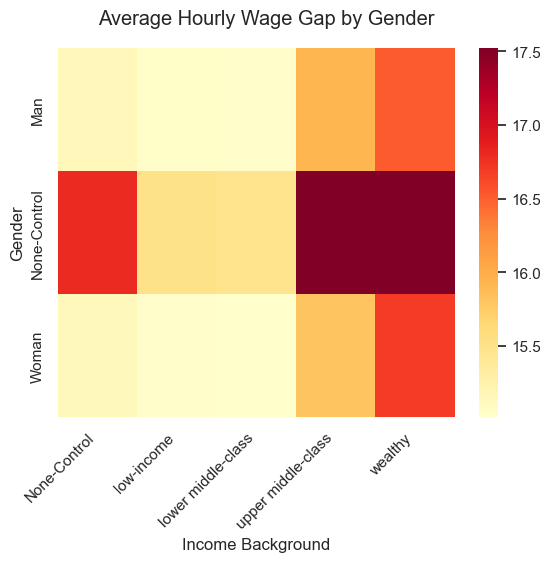

In [6]:
pivot= pd.pivot_table(df, values='wage_avg', index = ['gender'], columns = ['income'], aggfunc = 'mean')
sns.heatmap(pivot, cmap = 'YlOrRd')
plt.suptitle("Average Hourly Wage Gap by Gender", x=.45,y=.96)
plt.ylabel("Gender")
plt.xlabel("Income Background")
plt.xticks(rotation=45, ha="right")
plt.show()

### Average Hourly Wage Gap by Race Heatmap

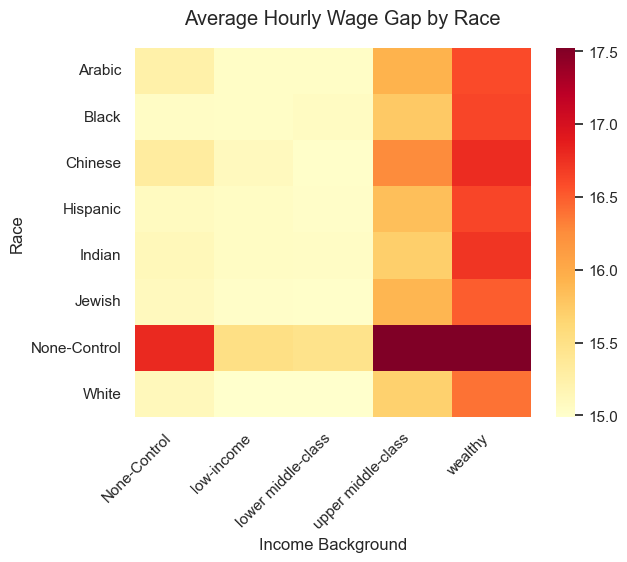

In [7]:
pivot= pd.pivot_table(df, values='wage_avg', index = ['race'], columns = ['income'], aggfunc = 'mean')
sns.heatmap(pivot, cmap = 'YlOrRd')
plt.suptitle("Average Hourly Wage Gap by Race",x=.45,y=.96)
plt.ylabel("Race")
plt.xlabel("Income Background")
plt.xticks(rotation=45, ha="right")
plt.show()

### Average Hourly Wage Differences by Race, Gender, and Income Heatmap

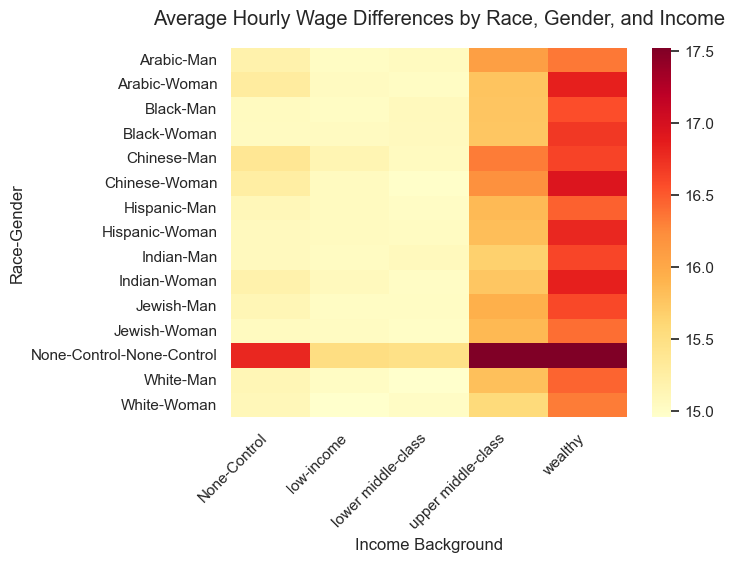

In [296]:
pivot= pd.pivot_table(df, values='wage_avg', index = ['race', 'gender'], columns = ['income'], aggfunc = 'mean')
sns.heatmap(pivot, cmap = 'YlOrRd')
plt.suptitle("Average Hourly Wage Differences by Race, Gender, and Income",x=.45,y=.96)
plt.ylabel("Race-Gender")
plt.xlabel("Income Background")
plt.xticks(rotation=45, ha="right")
plt.show()

### Minimum Hourly Wage Differences by Race, Gender, and Income Heatmap

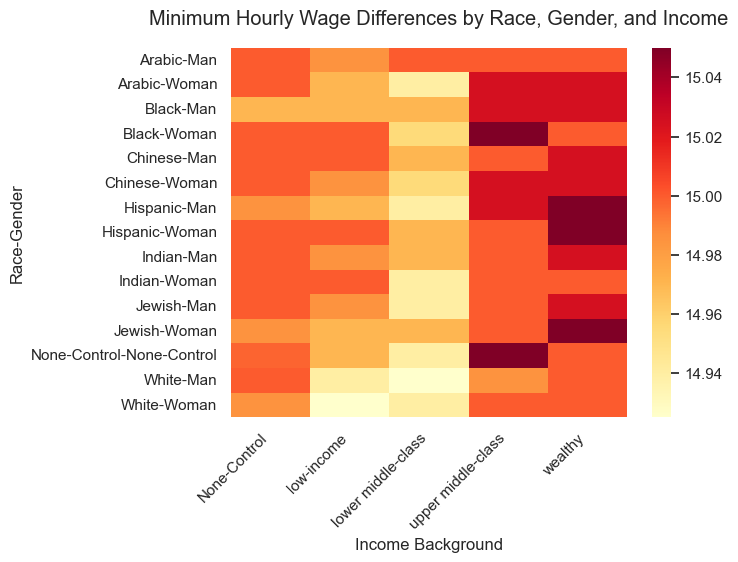

In [301]:
pivot= pd.pivot_table(df, values='low_end', index = ['race', 'gender'], columns = ['income'], aggfunc = 'mean')
sns.heatmap(pivot, cmap = 'YlOrRd')
plt.suptitle("Minimum Hourly Wage Differences by Race, Gender, and Income",x=.45,y=.96)
plt.ylabel("Race-Gender")
plt.xlabel("Income Background")
plt.xticks(rotation=45, ha="right")
plt.show()

### Maximum Hourly Wage Differences by Race, Gender, and Income Heatmap¶

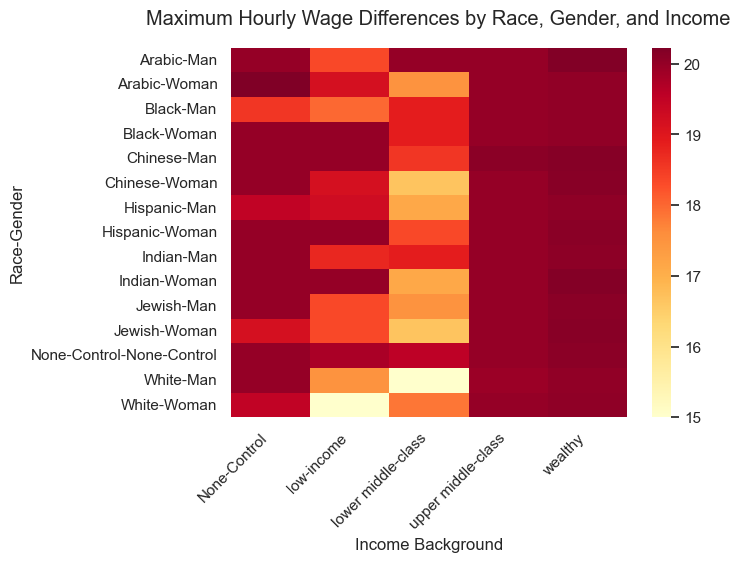

In [10]:
pivot= pd.pivot_table(df, values='high_end', index = ['race', 'gender'], columns = ['income'], aggfunc = 'mean')
sns.heatmap(pivot, cmap = 'YlOrRd')
plt.suptitle("Maximum Hourly Wage Differences by Race, Gender, and Income",x=.45,y=.96)
plt.ylabel("Race-Gender")
plt.xlabel("Income Background")
plt.xticks(rotation=45, ha="right")
plt.show()

### Median Hourly Wage Differences by Race, Gender, and Income Heatmap

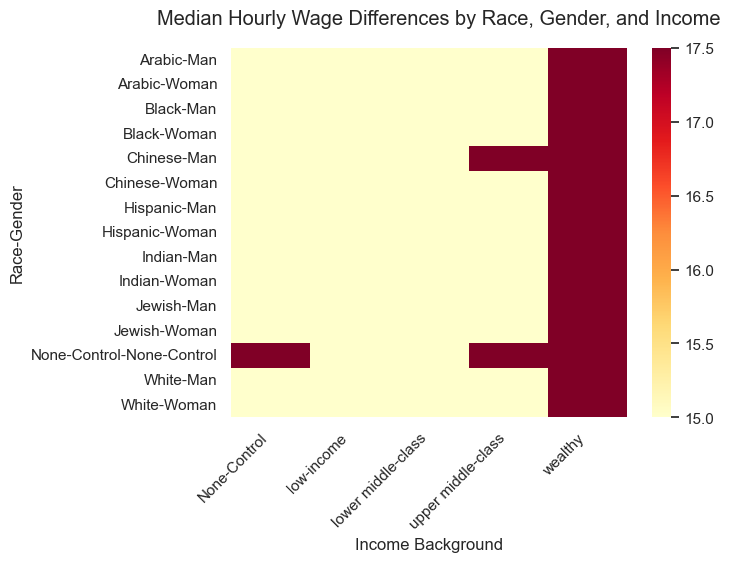

In [302]:
pivot= pd.pivot_table(df, values='wage_avg', index = ['race', 'gender'], columns = ['income'], aggfunc = 'median')
sns.heatmap(pivot, cmap = 'YlOrRd')
plt.suptitle("Median Hourly Wage Differences by Race, Gender, and Income",x=.45,y=.96)
plt.ylabel("Race-Gender")
plt.xlabel("Income Background")
plt.xticks(rotation=45, ha="right")
plt.show()

## Gender Gap Analysis

In [12]:
#Credit of function implementation to Stuart Geiger
gender_stats_diff = (
    df.groupby(['race', 'gender'])['low_end']
    .agg(['mean', 'median'])
    .unstack()  # Split the gender into separate columns
)

# Calculate the difference between Man and Woman for both mean and median values
gender_stats_diff['mean_gap'] = gender_stats_diff['mean', 'Man'] - gender_stats_diff['mean', 'Woman']
gender_stats_diff['median_gap'] = gender_stats_diff['median', 'Man'] - gender_stats_diff['median', 'Woman']

# Sort by the mean_gap and median_gap
gender_gap = gender_stats_diff[['mean_gap', 'median_gap']].sort_values(by = ['mean_gap']).reset_index().drop(7)
gender_gap

,race,mean_gap,median_gap
gender,,,
0,Hispanic,-0.010,0.0
1,Black,-0.009,0.0
2,Jewish,-0.005,0.0
3,White,0.000,0.0
4,Chinese,0.001,0.0
5,Arabic,0.005,0.0
6,Indian,0.008,0.0


In [293]:
df.groupby('wage_avg').count()

,custom_id,model,query_response_raw,run_id,name,gender,race,income,low_end,high_end
wage_avg,,,,,,,,,,
12.0,6,6,6,6,6,6,6,6,6,0
13.5,66,66,66,66,66,66,66,66,66,66
15.0,11204,11204,11204,11204,11204,11204,11204,11204,11204,0
16.0,1,1,1,1,1,1,1,1,1,1
17.5,3464,3464,3464,3464,3464,3464,3464,3464,3464,3464
20.0,59,59,59,59,59,59,59,59,59,39


### Mean Gender Gap by Race Barplot

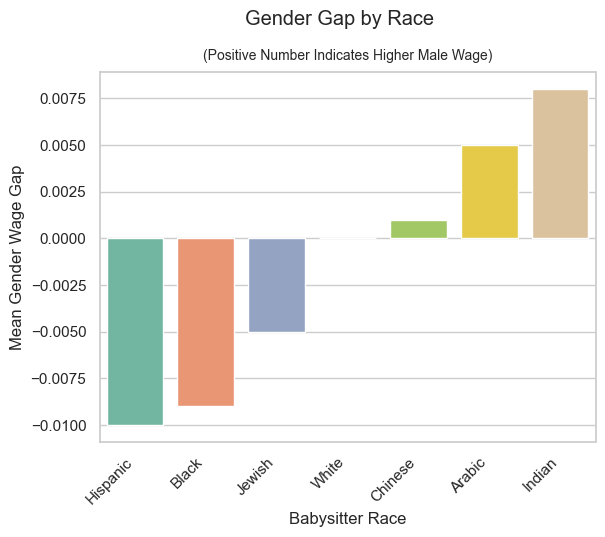

In [303]:
sns.barplot(data=gender_gap, y='mean_gap', x="race", palette=sns.color_palette("Set2"))
plt.suptitle("Gender Gap by Race",x=.5,y=1.01)
plt.title("(Positive Number Indicates Higher Male Wage)",x=.5,y=1.01, fontsize = "small")
plt.ylabel("Mean Gender Wage Gap")
plt.xlabel("Babysitter Race")
plt.xticks(rotation=45, ha="right")
plt.show()

### Distribution of Hourly Wage Recommendation by Income Background Boxplot

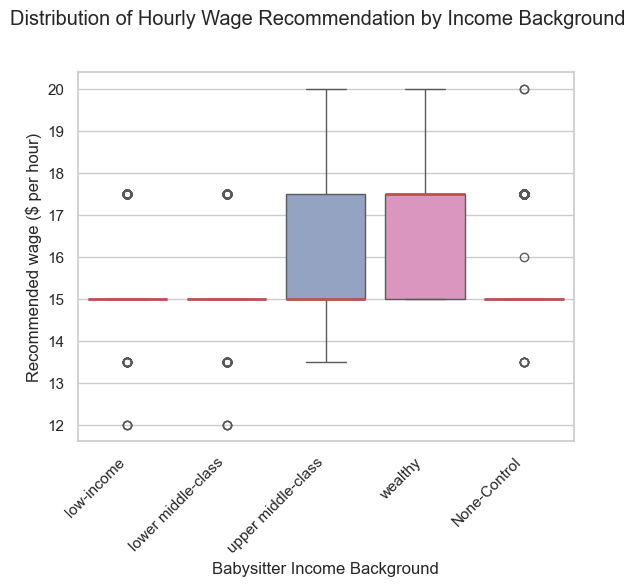

In [304]:
sns.boxplot(data=df, hue='income', y='wage_avg', x="income", palette=sns.color_palette("Set2"), medianprops={"color": "r", "linewidth": 2})
plt.suptitle('Distribution of Hourly Wage Recommendation by Income Background',x=.5,y=1.01)
plt.ylabel("Recommended wage ($ per hour)")
plt.xlabel("Babysitter Income Background")
plt.xticks(rotation=45, ha="right")
plt.show()

### Distribution of Hourly Wage Recommendation by Income Background and Gender Boxplot

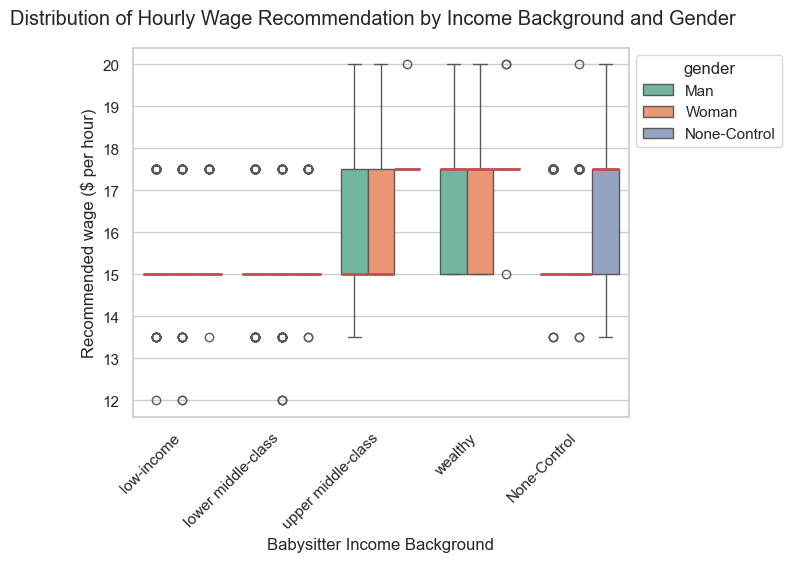

In [15]:
bp = sns.boxplot(data=df, hue='gender', y='wage_avg', x="income", palette=sns.color_palette("Set2"), medianprops={"color": "r", "linewidth": 2})
plt.suptitle('Distribution of Hourly Wage Recommendation by Income Background and Gender',x=.5,y=.96)
plt.ylabel("Recommended wage ($ per hour)")
plt.xlabel("Babysitter Income Background")
plt.xticks(rotation=45, ha="right")
sns.move_legend(bp, "upper left", bbox_to_anchor=(1, 1))
plt.show()

### Wage Gap by Race Table

In [297]:
def calculate_race_gaps(group):
    #function credit to Stuart Geiger
    mean_values = group.groupby('race')['wage_avg'].mean()
    median_values = group.groupby('race')['wage_avg'].median()

    # Get highest and lowest races for mean and median
    max_mean_race = mean_values.idxmax()
    min_mean_race = mean_values.idxmin()
    max_median_race = median_values.idxmax()
    min_median_race = median_values.idxmin()

    return pd.Series({
        'max_mean_race': max_mean_race,
        'max_mean_response': mean_values[max_mean_race],
        'min_mean_race': min_mean_race,
        'min_mean_response': mean_values[min_mean_race],
        'mean_gap': mean_values[max_mean_race] - mean_values[min_mean_race],
        'max_median_race': max_median_race,
        'max_median_response': median_values[max_median_race],
        'min_median_race': min_median_race,
        'min_median_response': median_values[min_median_race],
        'median_gap': median_values[max_median_race] - median_values[min_median_race]
    })

# Applying the function to each model group
race_gap_detailed = df.groupby(["income"]).apply(calculate_race_gaps).reset_index()
race_gap_detailed

,income,max_mean_race,max_mean_response,min_mean_race,min_mean_response,mean_gap,max_median_race,max_median_response,min_median_race,min_median_response,median_gap
0,None-Control,None-Control,16.7925,Black,15.04250,1.75000,None-Control,17.5,Arabic,15.0,2.5
1,low-income,None-Control,15.5100,White,14.98750,0.52250,Arabic,15.0,Arabic,15.0,0.0
2,lower middle-class,None-Control,15.4700,White,14.98750,0.48250,Arabic,15.0,Arabic,15.0,0.0
3,upper middle-class,None-Control,17.5250,White,15.68375,1.84125,None-Control,17.5,Arabic,15.0,2.5
4,wealthy,None-Control,17.5250,White,16.38750,1.13750,Arabic,17.5,Arabic,17.5,0.0


### Distribution of Hourly Wage Recommendation by Income Background and Race Boxplot

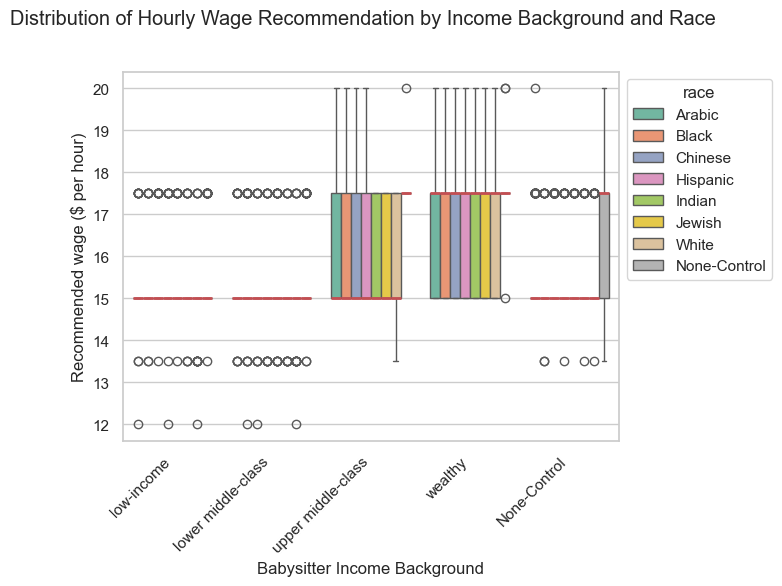

In [17]:
bp = sns.boxplot(data=df, hue='race', y='wage_avg', x="income", palette=sns.color_palette("Set2"), medianprops={"color": "r", "linewidth": 2})
plt.suptitle('Distribution of Hourly Wage Recommendation by Income Background and Race',x=.5,y=1.01)
plt.ylabel("Recommended wage ($ per hour)")
plt.xlabel("Babysitter Income Background")
plt.xticks(rotation=45, ha="right")
sns.move_legend(bp, "upper left", bbox_to_anchor=(1, 1))
plt.show()

### Distribution of Hourly Wage Recommendation by Income Background Stripplot

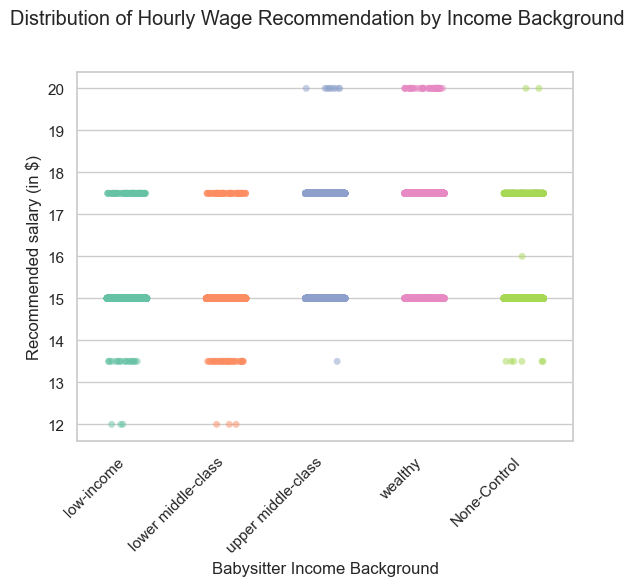

In [18]:
sns.stripplot(data=df, x = 'income', y = 'wage_avg', palette=sns.color_palette("Set2"), jitter = .2, alpha =.5)
plt.suptitle('Distribution of Hourly Wage Recommendation by Income Background',x=.5,y=1.01)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Recommended salary (in $)")
plt.xlabel("Babysitter Income Background")
plt.show()

### Distribution of Hourly Wage Recommendation by Race Boxplot

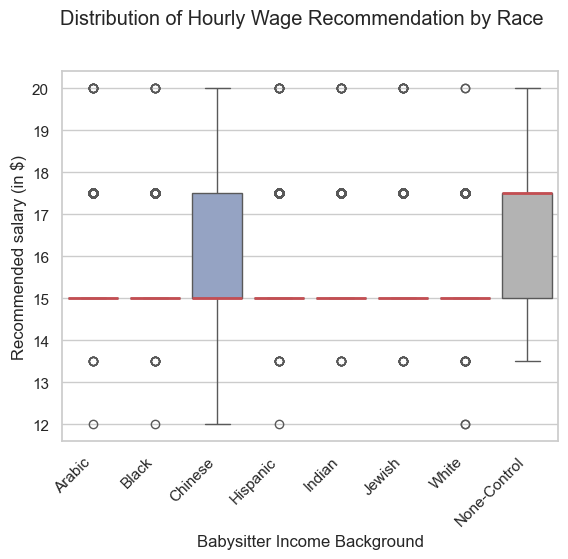

In [19]:
sns.boxplot(data=df, x = 'race', y = 'wage_avg', palette=sns.color_palette("Set2"), medianprops={"color": "r", "linewidth": 2})
plt.suptitle('Distribution of Hourly Wage Recommendation by Race',x=.5,y=1.01)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Recommended salary (in $)")
plt.xlabel("Babysitter Income Background")
plt.show()

### Distribution of Hourly Wage Recommendation by Race and Gender Boxplot

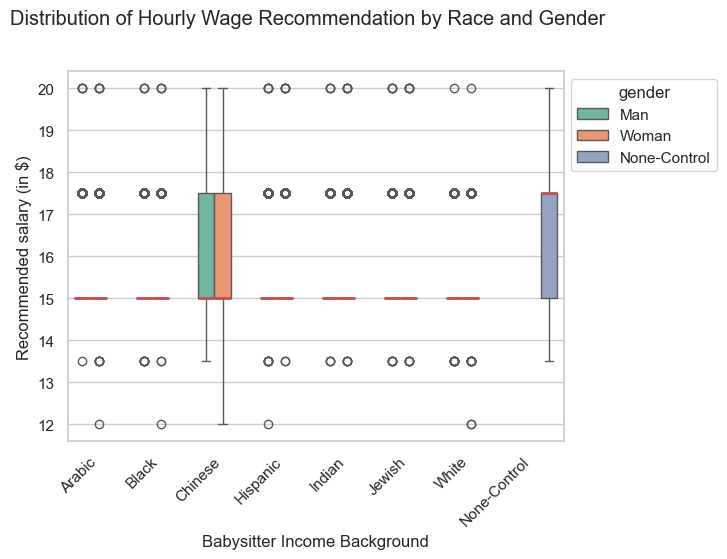

In [305]:
bp = sns.boxplot(data=df, x = 'race', y = 'wage_avg', hue = 'gender', palette=sns.color_palette("Set2"), medianprops={"color": "r", "linewidth": 2})
plt.suptitle('Distribution of Hourly Wage Recommendation by Race and Gender',x=.5,y=1.01)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Recommended salary (in $)")
plt.xlabel("Babysitter Income Background")
sns.move_legend(bp, "upper left", bbox_to_anchor=(1, 1))
plt.show()

## Hypothesis Testing

In [21]:
def color_bool(val):
    if val == False and type(val) != float:
        color = 'red'
    elif val == True:
        color = 'green'
    else:
        color = 'black'
    #color = 'red' if val == False else 'green'
    return 'color: %s' % color

In [259]:
result = better_posthoc_dunns(df, 'wage_avg', 'gender', total_comparisons=91)
result.style.applymap(color_bool)

,gender1,gender2,median_diff,mean_diff,Z_score,p_value,p_adj,reject_p05,reject_p0005
0,Man,None-Control,-2.500000,-1.000000,27.590000,0.000000,0.000000,True,True
1,Man,Woman,0.000000,-0.000000,0.460000,0.643869,58.592082,False,False
2,None-Control,Woman,2.500000,1.000000,27.390000,0.000000,0.000000,True,True


In [260]:
result = better_posthoc_dunns(df, 'wage_avg', 'race', total_comparisons=91)
result.style.applymap(color_bool)

,race1,race2,median_diff,mean_diff,Z_score,p_value,p_adj,reject_p05,reject_p0005
0,Arabic,Black,0.000000,0.000000,1.750000,0.079739,7.256279,False,False
1,Arabic,Chinese,0.000000,-0.000000,3.610000,0.000304,0.027701,True,False
2,Arabic,Hispanic,0.000000,0.000000,1.250000,0.210744,19.177722,False,False
3,Arabic,Indian,0.000000,0.000000,1.060000,0.290022,26.392044,False,False
4,Arabic,Jewish,0.000000,0.000000,1.860000,0.062429,5.681001,False,False
5,Arabic,None-Control,-2.500000,-1.000000,23.860000,0.000000,0.000000,True,True
6,Arabic,White,0.000000,0.000000,3.810000,0.000138,0.012600,True,False
7,Black,Chinese,0.000000,-0.000000,5.360000,0.000000,0.000007,True,True
8,Black,Hispanic,0.000000,-0.000000,0.500000,0.616597,56.110343,False,False
9,Black,Indian,0.000000,-0.000000,0.690000,0.487602,44.371766,False,False


In [261]:
result = better_posthoc_dunns(df, 'wage_avg','income', total_comparisons=91)
result.style.applymap(color_bool)

,income1,income2,median_diff,mean_diff,Z_score,p_value,p_adj,reject_p05,reject_p0005
0,None-Control,low-income,0.000000,0.000000,10.640000,0.000000,0.000000,True,True
1,None-Control,lower middle-class,0.000000,0.000000,11.290000,0.000000,0.000000,True,True
2,None-Control,upper middle-class,0.000000,-1.000000,20.540000,0.000000,0.000000,True,True
3,None-Control,wealthy,-2.500000,-1.000000,45.370000,0.000000,0.000000,True,True
4,low-income,lower middle-class,0.000000,0.000000,0.640000,0.521898,47.492724,False,False
5,low-income,upper middle-class,0.000000,-1.000000,30.440000,0.000000,0.000000,True,True
6,low-income,wealthy,-2.500000,-2.000000,54.680000,0.000000,0.000000,True,True
7,lower middle-class,upper middle-class,0.000000,-1.000000,31.080000,0.000000,0.000000,True,True
8,lower middle-class,wealthy,-2.500000,-2.000000,55.320000,0.000000,0.000000,True,True
9,upper middle-class,wealthy,-2.500000,-1.000000,24.250000,0.000000,0.000000,True,True


## Regression

In [262]:
# creating dummy variables
race_mapping = {
    'Arabic': 9,
    'Black': 2,
    'Chinese': 3,
    'Hispanic': 4,
    'Indian': 5,
    'Jewish': 6,
    'None-Control': 7,
    'White': 8,
    'None-Control': 1
}

gender_mapping = {
    'Man': 3,
    'Woman': 2,
    'None-Control': 1
}

income_mapping = {
    'low-income': 2,
    'lower middle-class': 3,
    'upper middle-class': 4,
    'wealthy': 5,
    'None-Control': 1
}

In [263]:
# Transforming categorical columns to numeric
df_reg = df
df_reg['race'] = df_reg['race'].map(race_mapping)
df_reg['gender'] = df_reg['gender'].map(gender_mapping)
df_reg['income'] = df_reg['income'].map(income_mapping)

In [264]:
df_reg.head()

,custom_id,model,query_response_raw,run_id,name,gender,race,income,low_end,high_end,wage_avg
0,task-0,gpt-4o-mini-2024-07-18,$15 per hour.,0,Osama Mubbaarak,3,9,2,15,NaN,15.0
1,task-1,gpt-4o-mini-2024-07-18,$15 per hour.,1,Osama Mubbaarak,3,9,2,15,NaN,15.0
2,task-2,gpt-4o-mini-2024-07-18,$15 per hour.,2,Osama Mubbaarak,3,9,2,15,NaN,15.0
3,task-3,gpt-4o-mini-2024-07-18,$15 per hour.,3,Osama Mubbaarak,3,9,2,15,NaN,15.0
4,task-4,gpt-4o-mini-2024-07-18,$15 per hour.,4,Osama Mubbaarak,3,9,2,15,NaN,15.0


In [27]:
# verifying no nan values in relevent features
df_reg.isnull().sum()

custom_id                 0
model                     0
query_response_raw        0
run_id                    0
name                      0
gender                    0
race                      0
income                    0
low_end                   0
high_end              11230
wage_avg                  0
dtype: int64

In [228]:
df.head()

,custom_id,model,query_response_raw,run_id,name,gender,race,income,low_end,high_end,wage_avg
0,task-0,gpt-4o-mini-2024-07-18,$15 per hour.,0,Osama Mubbaarak,3,9,2,15,NaN,15.0
1,task-1,gpt-4o-mini-2024-07-18,$15 per hour.,1,Osama Mubbaarak,3,9,2,15,NaN,15.0
2,task-2,gpt-4o-mini-2024-07-18,$15 per hour.,2,Osama Mubbaarak,3,9,2,15,NaN,15.0
3,task-3,gpt-4o-mini-2024-07-18,$15 per hour.,3,Osama Mubbaarak,3,9,2,15,NaN,15.0
4,task-4,gpt-4o-mini-2024-07-18,$15 per hour.,4,Osama Mubbaarak,3,9,2,15,NaN,15.0


### Intersectional Regression

In [306]:
model = smf.ols(formula='wage_avg ~ C(income) * (C(gender) + C(race))', data=df).fit()
results = pd.DataFrame(model.summary2().tables[1]['P>|t|'])

In [307]:
results['b_correction'] = (results['P>|t|'] * 91) 
results['reject_p05'] = results['b_correction']< .05
results['reject_p005'] = results['b_correction']< .005

In [308]:
display(results)

,P>|t|,b_correction,reject_p05,reject_p005
Intercept,0.000000e+00,0.000000e+00,True,True
C(income)[T.low-income],1.573818e-03,1.432174e-01,False,False
C(income)[T.lower middle-class],2.796560e-03,2.544870e-01,False,False
C(income)[T.upper middle-class],1.485491e-29,1.351796e-27,True,True
C(income)[T.wealthy],4.164941e-83,3.790097e-81,True,True
C(gender)[T.None-Control],1.658762e-129,1.509473e-127,True,True
C(gender)[T.Woman],8.960145e-01,8.153732e+01,False,False
C(race)[T.Black],1.482304e-03,1.348897e-01,False,False
C(race)[T.Chinese],1.853681e-01,1.686850e+01,False,False
C(race)[T.Hispanic],1.221083e-02,1.111186e+00,False,False
